In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

#Task 1: Markov Chains.
Let's break this down step-by-step, starting with:

###(1) Constructing the Transition Matrix 𝐴

![Markov Chain Diagram](https://drive.google.com/uc?export=view&id=1V1py-nSnjJdsR4LN6JlLQ7eTXWrDV5Mi)


Given four states:
* Idle (I)
* Working (W)
* Broken (B)
* Repair (R)

The probabilities of transitioning between these states each hour are specified. Using this, the transition matrix 𝐴 can be constructed as follows:

* Idle (I):
  * Stays Idle: 5%
  * Transitions to Working: 93%
  * Transitions to Broken: 2%

* Working (W):
  * Transitions to Idle: 10%
  * Stays Working: 86%
  * Transitions to Broken: 4%
* Broken (B):
  * Stays Broken: 80%
  * Transitions to Repair: 20%
* Repair (R):
  * Transitions to Idle: 50%
  * Transitions to Working: 10%
  * Stays in Repair: 40%

These probabilities form the rows of the transition matrix 𝐴:

𝐴 = \begin{bmatrix}
0.05 & 0.10 & 0.00 & 0.50 \\
0.93 & 0.86 & 0.00 & 0.10 \\
0.02 & 0.04 & 0.80 & 0.00 \\
0.00 & 0.00 & 0.20 & 0.40
\end{bmatrix}



Here’s how we can construct this in Python using NumPy:


In [ ]:
# Question 1
A = np.array([
    [0.05, 0.10, 0.00, 0.50],
    [0.93, 0.86, 0.00, 0.10],
    [0.02, 0.04, 0.80, 0.00],
    [0.00, 0.00, 0.20, 0.40]
])

# A = np.array([
#     [0.05, 0.93, 0.02, 0.00],  # Idle row
#     [0.10, 0.86, 0.04, 0.00],  # Working row
#     [0.00, 0.00, 0.80, 0.20],  # Broken row
#     [0.50, 0.10, 0.00, 0.40]   # Repair row
# ])

print(A)

# Verifying columns sum to 1
row_sums = np.sum(A, axis=0)
print("Row sums (should be 1 as this is a markov matrix):", row_sums)

[[0.05 0.1  0.   0.5 ]
 [0.93 0.86 0.   0.1 ]
 [0.02 0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]]
Row sums (should be 1 as this is a markov matrix): [1. 1. 1. 1.]


In [ ]:
# Initial state: all machines are Working
state0 = np.array([0, 200, 0, 0])
state0 = state0.reshape(-1, 1)
state1 = A @ state0
print(state1)
print("Sum of machines in state_1 =", int(np.sum(state1)))

[[ 20.]
 [172.]
 [  8.]
 [  0.]]
Sum of machines in state_1 = 200


In [ ]:
state0.shape

(4, 1)

###(2) Simulating the Markov Chain over Time
Next, we need to simulate the Markov chain for 24 hours, assuming all 200 machines start in the Working state.

Initial state vector (at hour 0):

state = \begin{bmatrix}
0 &
200 &
0 &
0
\end{bmatrix}


The state at each subsequent hour is calculated by multiplying the previous state vector by the transition matrix 𝐴 For example, the state after 1 hour is:

$state_1 = A × state_0$


This process can be repeated for 24 hours, so as to find the state of the system by the 24th hour.

Having gotten $state_1$ value we can get the next state after which is the 2nd hour state, which would be $state_2 = A × state_1 = A × A × state_0 = A^2 × state_0$. There is a pattern where it can be seen that for an nth state, $state_n$ then we can have: $state_n = A^n × state_0$

Let’s compute the expected number of machines in each state over time and plot the results:

####**Solution 1**

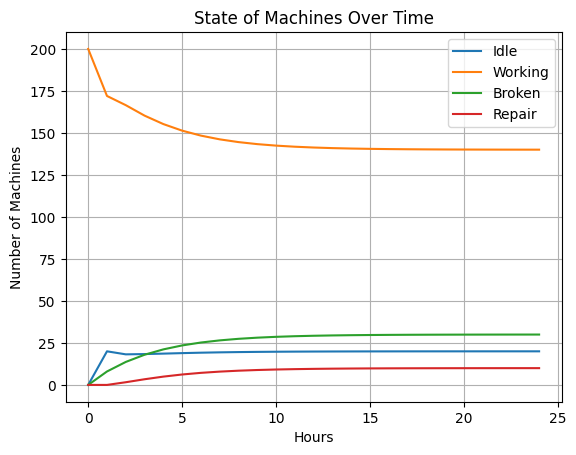

In [ ]:
# Question 2
# Solution 1

# Initial state: all machines are Working
state = np.array([0, 200, 0, 0])
state = state.reshape(-1, 1)

# To store the number of machines in each state over time
states_over_time = [state]

# Simulate for 24 hours
for v in range(24):
    state = A @ state # Matrix-vector multiplication
    states_over_time.append(state)

states_over_time = np.array(states_over_time)

# Plotting the results
plt.plot(states_over_time[:, 0], label='Idle')
plt.plot(states_over_time[:, 1], label='Working')
plt.plot(states_over_time[:, 2], label='Broken')
plt.plot(states_over_time[:, 3], label='Repair')

plt.xlabel('Hours')
plt.ylabel('Number of Machines')
plt.title('State of Machines Over Time')
plt.legend()
plt.grid(True)
plt.show()

#####**Explanation - Solution 1**
The highlighted code snippet:
```python
for v in range(24):
    state = A @ state # Matrix-vector multiplication
    states_over_time.append(state)
```


is part of a loop that simulates the state of the machines over 24 hours based on a Markov chain transition matrix 𝐴 and the current state of the machines at each hour.

Here’s a breakdown of what each part means:

> for v in range(24):

* This loop runs 24 times, representing each hour. The letter (v) is used as a throwaway variable because the loop's index isn't needed for further calculations.

> $state = A$ $@$ $state$

* This is the key operation where matrix-vector multiplication is performed. The matrix 𝐴 represents the transition probabilities between machine states (Idle, Working, Broken, Repair).
* The vector <mark>state</mark> contains the number of machines in each state at the current hour.
* The result of the matrix-vector multiplication gives the updated state of the system after one time step (one hour), based on the transitions encoded in matrix 𝐴. The operation <mark>A @ state</mark> is equivalent to <mark>A × state</mark>, where <mark>@</mark> denotes matrix multiplication in Python.

> states_over_time.append(state)

* This appends the updated <mark>state</mark> vector (the new number of machines in each state after the transitions) to the <mark>states_over_time</mark> list.
* As the loop progresses, this list stores the number of machines in each state for each hour over the 24-hour period.

In summary, this part of the code is evolving machine states over time, where the system's state is updated hour by hour according to the transition probabilities specified in the matrix 𝐴.

####**Solution 2**

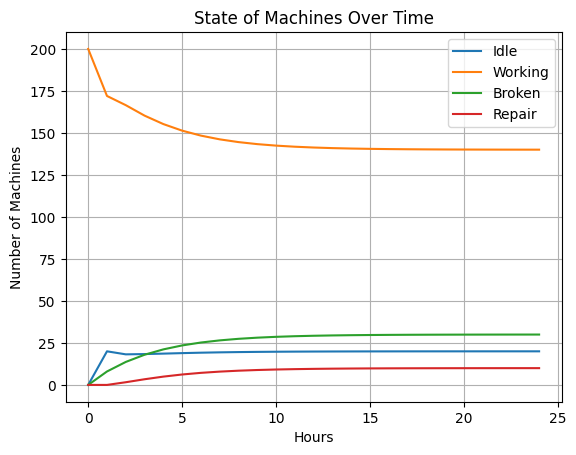

In [ ]:
# Question 2
# Solution 2

# Initial state: all machines are Working
state_0 = np.array([0, 200, 0, 0])
state_0 = state_0.reshape(-1, 1)

# To store the number of machines in each state over time
states_over_time = [state_0]

# Simulating for 24 hours using matrix powers
for n in range(1, 25):
    A_n = np.linalg.matrix_power(A, n)  # Compute A^n
    state_n = np.dot(A_n, state_0)  # Calculate state_n as A^n * state_0
    states_over_time.append(state_n)

states_over_time = np.array(states_over_time)

# Plotting the results
plt.plot(states_over_time[:, 0], label='Idle')
plt.plot(states_over_time[:, 1], label='Working')
plt.plot(states_over_time[:, 2], label='Broken')
plt.plot(states_over_time[:, 3], label='Repair')

plt.xlabel('Hours')
plt.ylabel('Number of Machines')
plt.title('State of Machines Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# all idle states from initial state (state 0) to 24th hour state (state24)
print(states_over_time[:, 1])

[[200.        ]
 [172.        ]
 [166.52      ]
 [160.2932    ]
 [155.266412  ]
 [151.35447092]
 [148.3910493 ]
 [146.17794263]
 [144.53859142]
 [143.32995605]
 [142.44132321]
 [141.78902519]
 [141.3106653 ]
 [140.96006032]
 [140.70317685]
 [140.51499912]
 [140.37716738]
 [140.27621883]
 [140.20228673]
 [140.14814212]
 [140.10848955]
 [140.07945043]
 [140.05818405]
 [140.04260998]
 [140.03120459]]


In [ ]:
print(states_over_time)

[[[  0.        ]
  [200.        ]
  [  0.        ]
  [  0.        ]]

 [[ 20.        ]
  [172.        ]
  [  8.        ]
  [  0.        ]]

 [[ 18.2       ]
  [166.52      ]
  [ 13.68      ]
  [  1.6       ]]

 [[ 18.362     ]
  [160.2932    ]
  [ 17.9688    ]
  [  3.376     ]]

 [[ 18.63542   ]
  [155.266412  ]
  [ 21.154008  ]
  [  4.94416   ]]

 [[ 18.9304922 ]
  [151.35447092]
  [ 23.50657128]
  [  6.2084656 ]]

 [[ 19.1862045 ]
  [148.3910493 ]
  [ 25.2380457 ]
  [  7.1847005 ]]

 [[ 19.3907654 ]
  [146.17794263]
  [ 26.50980263]
  [  7.92148934]]

 [[ 19.5480772 ]
  [144.53859142]
  [ 27.44277511]
  [  8.47055626]]

 [[ 19.66654113]
  [143.32995605]
  [ 28.12672529]
  [  8.87677753]]

 [[ 19.75471143]
  [142.44132321]
  [ 28.6279093 ]
  [  9.17605607]]

 [[ 19.81989593]
  [141.78902519]
  [ 28.9950746 ]
  [  9.39600429]]

 [[ 19.86789946]
  [141.3106653 ]
  [ 29.2640186 ]
  [  9.55741663]]

 [[ 19.90316982]
  [140.96006032]
  [ 29.46099948]
  [  9.67577037]]

 [[ 19.92904971]
  [

#####**Explanation - Solution 2**
The highlighted code snippet:
```python
# Simulating for 24 hours using matrix powers
for n in range(1, 25):
    A_n = np.linalg.matrix_power(A, n)  # Compute A^n
    state_n = np.dot(A_n, state_0)  # Calculate state_n as A^n * state_0
    states_over_time.append(state_n)
```


is part of a loop that simulates the state of the machines over 24 hours based on a Markov chain transition matrix 𝐴 just like in **Solution 1**.

Here’s a breakdown of what each part means:

> for n in range(1, 25):

* This loop runs 24 times, representing each hour. The letter (n) is used as a throwaway variable because the loop's index isn't needed for further calculations like in **solution 1**.

> state = np.dot(A_n, state_0)

* This is the key operation where matrix-vector multiplication is performed. The matrix 𝐴_n represents the transition matrix at nth hour of operation where each machine states are; Idle, Working, Broken, Repair.
* The vector <mark>state_0</mark> contains the number of machines in the initial state, that is the starting state.
* The result of the matrix-vector dot multiplication in this 2nd solution (**solution 2**) gives the updated state of the system after one time step (one hour), based on iteration which goes from 1 to 25 but ends on the 24th iteration as the 25th iteration is passed. The operation <mark>np.dot(A_n, state_0)</mark> is equivalent to <mark>$A^n × state_0$</mark>, where <mark>np.dot()</mark> denotes dot product / matrix multiplication in Python.

> states_over_time.append(state_n)

* This appends the updated $nth$ <mark>state_n</mark> vector (the new number of machines in each state after the transitions) to the <mark>states_over_time</mark> list.
* As the loop progresses, this list stores the number of machines in each state for each hour over the 24-hour period.

In summary, this part of the code is evolving machine states over time, where the system's state is updated hour by hour according to the transition probabilities specified in the $matrix 𝐴$.

####**Eigenvectors & Long-run steady state**

In [ ]:
# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the eigenvector corresponding to eigenvalue 1 (steady state)
steady_state_vector = eigenvectors[:, np.isclose(eigenvalues, 1)].real.squeeze()

# Normalize the steady-state vector to sum to 200 machines
steady_state_vector = (steady_state_vector / np.sum(steady_state_vector)) * 200

print("steady state vector = ", steady_state_vector)

steady state vector =  [ 20. 140.  30.  10.]


In [ ]:
print("Eigenvalues:", eigenvalues)

Eigenvalues: [-0.05659878  1.          0.73232996  0.43426882]


In [ ]:
print("Eigenvectors:", eigenvectors)

Eigenvectors: [[ 0.70224021 -0.13801311  0.0841534   0.33700315]
 [-0.71170273 -0.96609178 -0.83353499 -0.83629975]
 [ 0.01683788 -0.20701967  0.46783381  0.07303705]
 [-0.00737535 -0.06900656  0.28154778  0.42625955]]


#####**Observations from the Code and Output**

Eigenvalues:

The eigenvalues of the matrix $𝐴$ are $[-0.0566, 1.0, 0.7323, 0.4343]$.
The eigenvalue 1 is particularly important in Markov chains because it indicates a steady state solution; the steady state solution is the state the system will converge to over time, regardless of the initial conditions.

Eigenvector Corresponding to Eigenvalue 1:

The eigenvector corresponding to the eigenvalue 1 gives the steady-state distribution of the system. In other words, this eigenvector represents the expected proportion of machines in each state (Idle, Working, Broken, Repair) in the long run.

The eigenvector was identified and normalized to ensure that its entries sum to a total of 200 machines, matching the overall number of machines in the system.

The steady state vector is $[20, 140, 30, 10]$, indicating that, in the long run, we would expect:

* 20 machines to be in the Idle state,
* 140 machines to be in the Working state,
* 30 machines to be in the Broken state, and
* 10 machines to be in the Repair state.


This steady state eigenvector reflects a stable distribution of the system over time. Once this steady state is reached, the proportion of machines in each state remains constant, even though individual machines may transition between states. This is a key insight for how maintenance and resource allocation should be carried: knowing that 140 machines will typically be working while 10 are undergoing repair allows for better planning and support for the system’s demands.

In summary, the eigenvector corresponding to the eigenvalue of 1 reveals the long term expected distribution of machines in each state, providing insight into the <mark>long term steady state of the system</mark>.

###(3) Modifying the Transition Matrix with New Policy
The new policy introduced allows idle machines to be switched off and prepared to be sold, meaning they won’t return to any other state. This implies that once a machine enters the Idle state, it stays there forever.

Thus, ![Markov Chain Diagram](https://drive.google.com/uc?export=view&id=1FYFQlRaqarXbTcJdNv1S0Z9fi_BUGbES)

To reflect this, we modify the transition $matrix 𝐴$ so that Idle machines always stay Idle. This changes the first row of the matrix to $[1, 0, 0, 0]$ which changes how the probabilities of transitioning between these states each hour are specified. Using this, the transition matrix 𝐴 can be reconstructed as follows:

* Idle (I):
  * Stays Idle: 100%

* Working (W):
  * Transitions to Idle: 10%
  * Stays Working: 86%
  * Transitions to Broken: 4%
* Broken (B):
  * Stays Broken: 80%
  * Transitions to Repair: 20%
* Repair (R):
  * Transitions to Idle: 50%
  * Transitions to Working: 10%
  * Stays in Repair: 40%

These probabilities form the rows of the transition matrix 𝐴:

$𝐴′$ = \begin{bmatrix}
1.00 & 0.10 & 0.00 & 0.50 \\
0.00 & 0.86 & 0.00 & 0.10 \\
0.00 & 0.04 & 0.80 & 0.00 \\
0.00 & 0.00 & 0.20 & 0.40
\end{bmatrix}


Next, using this modified matrix to estimate how many hours it takes until there are fewer than 20 Working machines, assuming the machines start in the long-run steady state. Let’s proceed with this in Python.

####  **Part (a): Modifying the Transition Matrix**

With the new policy, any Idle machine will be switched off and not transition back to other states. We’ll adjust the Idle row in the numpy array to ensure Idle machines remain Idle:

In [ ]:
# Adjusted matrix A for the new policy

A_new = np.array([
    [0.05, 0.10, 0.00, 0.50],
    [0.00, 0.86, 0.00, 0.10],
    [0.00, 0.04, 0.80, 0.00],
    [0.00, 0.00, 0.20, 0.40]
])

#####**To estimate how long until fewer than 20 machines remain in Working:**

* Set the initial state as in Task 1.2 ($State_0$ $= [0, 200, 0, 0]$).

* And then iterate until the Working state count drops below 20.

In [ ]:
state = np.array([0, 200, 0, 0])
state = state.reshape(-1, 1)
print("Working State = ", state[1]) # state[1] indexes the 2nd item in the current state array.

Working State =  [200]


In [ ]:
# Initialize with all machines in Working state
state = np.array([0, 200, 0, 0])
state = state.reshape(-1, 1)
hours = 0

while state[1] >= 20:
    state = A_new @ state
    hours += 1 # we continue incrementing the hour value till working state equals less (<) than 20, so loop continues for working state greater than or equal to (>=) 20

print(f"Number of hours until fewer than 20 machines remain in Working state: {hours}")


Number of hours until fewer than 20 machines remain in Working state: 17


####  **Part (b): Expected Time to Reach Idle from Other States**

To calculate $\mu_{ik}$, the expected time to reach Idle from other states:

* Remove the Idle row and column from
$𝐴_{new}$ to obtain matrix $𝑁$.
* Create the identity matrix $𝐼$.
* Calculate $(𝐼 − 𝑁)^{−1}$ and sum each column.

In [ ]:
# Submatrix N after removing Idle row and column.
N = A_new[1:, 1:]

# 3x3 Identity matrix
I = np.eye(3)

# Calculate (I - N)^{-1} and sum columns for expected times
inverse_matrix = np.linalg.inv(I - N)
expected_times = np.sum(inverse_matrix, axis=0)

print("Expected time to reach Idle state from Working, Broken, and Repair:", expected_times)

Expected time to reach Idle state from Working, Broken, and Repair: [9.5  8.25 3.25]


###(4) Adapting the Model for Infectious Disease
Each machine state can be viewed as representing stages of health in a disease model: for example, Susceptible, Infected, Recovered, Hospitalized and Dead.

Where;

* **Susceptible (Idle)**: Individuals who are not infected but can catch the disease.
* **Infected (Working)**: Individuals who are currently infected and spreading the disease.
* **Recovered (Broken)**: Individuals who have recovered from the disease.
* **Hospitalized/Quarantined (Repair)**: Individuals who are isolated from the population due to severe symptoms or for quarantine.

The transitions could be modeled as:

* **Susceptible to Infected**: People catch the disease based on interaction with infected individuals.
* **Infected to Recovered**: Infected individuals recover after some time.
* **Infected to Hospitalized**: Some infected individuals with severe symptoms are hospitalized or quarantined.
* **Hospitalized to Recovered**: After treatment or quarantine, individuals recover and can no longer spread the disease.
* **Recovered to Susceptible**: If immunity wanes over time, recovered individuals may become susceptible again (though this might be removed in some models).

An adapted transition matrix for the disease could look like this:

$Disease \ Model \ Matrix$ = \begin{bmatrix}
P_{S \; to \; S} & P_{S \; to \; I} & 0 & 0 \\
P_{I \; \text{to} \; S} & P_{I \; \text{to} \; I} & P_{I \; \text{to} \; R} & P_{I \; \text{to} \; H}  \\
0 & 0 & P_{R \; to \; R} & 0  \\
0 & 0 & P_{H \; to \; R} & P_{H \; to \; H}  
\end{bmatrix}



A <mark>weakness</mark> in applying this model to disease spread is that Markov chains assume memorylessness, meaning the next state depends only on the current state and not on previous states, which may not capture complexities like immunity or recovery duration accurately. Thus, making Markov chain more of a predictive analysis or estimate of a future state, making Markov chains less suitable for diseases with complex progression patterns.

Thus, ![Markov Chain Diagram](https://drive.google.com/uc?export=view&id=1pGoVz3IF8cVIuuAYffZrv8gPsVOIGcQv)

**A Markov diagram representation of the Infectious disease model**

 Using this, the transition matrix 𝐴 can be reconstructed as follows:

* Susceptible (S):
  * Stays Susceptible: $P_{S \; to \; S}$
  * Transistions to Infected: $P_{S \; to \; I}$

* Infected (I):
  * Transitions to Susceptible: $P_{I \; to \; S}$
  * Stays Infected: $P_{I \; to \; I}$
  * Transitions to Recovered: $P_{I \; to \; R}$
  * Transitions to Hospitalized: $P_{I \; to \; H}$

* Recovered (R):
  * Stays Recovered: $P_{R \; to \; R}$

* Hospitalized/Quarantined (H):
  * Transitions to Working: $P_{H \; to \; R}$
  * Stays Hospitalized: $P_{H \; to \; H}$

> In this case I have made a Markov model for an infectious disease using the Idle-Working-Broken-Repair Markov chain model where a person that has not fallen ill to this disease is susceptible to it, then someone who has recovered is immune to it so stays recovered, someone hospitalized either stays hospitalized or recovers, and  an infected person can get well on his own in early stages and possibly build immunity for the illness.




#Task 2: Eigen Faces.


**Initial Setup**

The Olivetti Faces dataset consists of 400 grayscale face images, each with dimensions 64 x 64 pixels (4096 pixels in total). The matrix $𝑋_{all}$ contains all images as columns, with each column representing a flattened 64x64 image (resulting in a 4096-row matrix with 400 columns).
$𝑋_{sub}$ is a subset containing the first 200 columns of $𝑋_{all}$.

###(1) Calculate and Visualize the Mean Face

**Steps:**

Calculate the Mean of Each Row: \
We compute the mean of each row in $𝑋_{sub}$, resulting in a **4096 x 1** vector $\bar{x}$ (or <mark>xbar</mark> in code), which represents the average grayscale value for each pixel across the 200 images.

Visualize the Mean Face:  \
Reshape <mark>xbar</mark> to a **64 x 64** array and visualize it to get an idea of the "average" facial appearance.

Compare with an Example Face: \
Using an image from <mark>Xsub</mark> corresponding to the last two digits of your student ID. Replace <mark>your_id_digits</mark> with the relevant value to fetch and visualize this face.

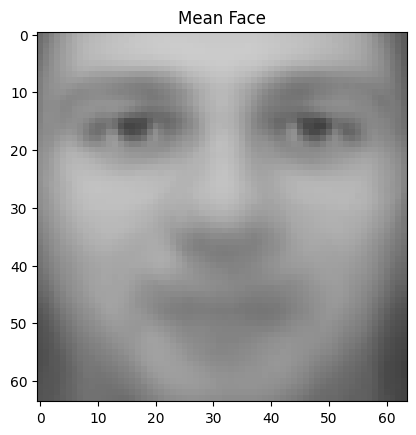

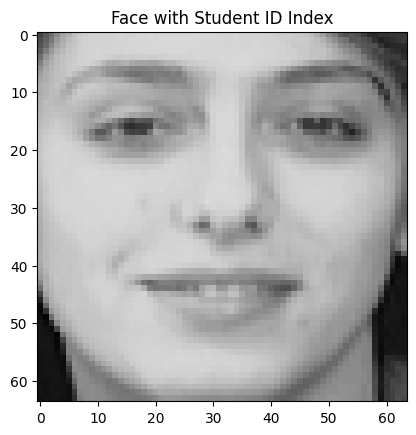

In [ ]:
# Step 1: Load the dataset and transpose it to match the requirements
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

faces = sklearn.datasets.fetch_olivetti_faces()
Xall = faces.data.T  # Transpose so each column is an image
Xsub = Xall[:, 0:200]  # Use the first 200 images

# Part 1: Mean Face
xbar = np.mean(Xsub, axis=1).reshape(4096, 1)  # Calculate mean face as a 4096x1 vector
plt.imshow(xbar.reshape(64, 64), cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title("Mean Face")
plt.show()

# Compare the mean face with a specific face (using the last two digits of the Student ID)
# Student ID = 15519674
student_id_face = Xsub[:, 74].reshape(64, 64)  # Adjust index as needed
plt.imshow(student_id_face, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title("Face with Student ID Index")
plt.show()

##### **Explanation**

* **Mean Face**: The mean face captures the average features across all faces, which tends to be a "blurred" look with common facial features but without distinct individual characteristics.
* **Comparison**: By comparing the mean face to an actual face (like <mark>example_face</mark>), we observe that individual features in the actual face are more pronounced and unique than in the mean face.

###(2) Covariance Matrix and Eigenfaces

**Steps:**

1.  Calculate the Covariance Matrix:
  * For $𝑋_{sub}$ (**4096 x 200** matrix), the covariance matrix $C$ is a 4096x4096 matrix calculated as $𝐶 \;= \;𝑋_{sub}𝑋_{sub}^𝑇$.

2.  Calculate Eigenvalues and Eigenvectors:
  * Using <mark>```np.linalg.eigh()```</mark>, we find the eigenvalues $V$ and eigenvectors $P$ of $C$.

3.  Sort in Descending Order:
  * Reverse the order of $V$ and columns of $P$ to arrange eigenvalues from largest to smallest.

4.  Verify Orthogonality:
  * Confirm that $P$ is orthogonal by checking $P^TP = I$.

5.  Visualize Top 8 Eigenfaces:
  * The eigenvectors (columns of $P$) are reshaped to 64x64 images and visualized. These represent the directions of highest variance in the face data, capturing prominent facial features.

In [ ]:
# Part 2: Covariance Matrix and Eigenfaces
C = np.cov(Xsub)  # Calculate covariance matrix (4096x4096)
V, P = np.linalg.eigh(C)  # Eigenvalues (V) and eigenvectors (P) of the covariance matrix
V = V[::-1]  # Reverse the order of eigenvalues
P = P[:, ::-1]  # Reverse the order of eigenvectors (to match eigenvalues)

###### This is an Orthogonal check using that $P^T = P^{-1}$
___

In [ ]:
# Verify orthogonality of P (P.T should be the inverse of P)
orthogonal_check_1 = np.allclose(P.T, np.linalg.inv(P))
print("Solution 1: P is orthogonal:", orthogonal_check_1)


Solution 1: P is orthogonal: True


###### This is an Orthogonal check using that $P^T$ x $P = I$

---



In [ ]:
# Verify orthogonality of P (P.T @ P should be an Identity matrix)
orthogonal_check_2 = np.allclose(P.T @ P, np.eye(P.shape[0])) # This method takes a lot of time to load
print("Solution 2: P is orthogonal:", orthogonal_check_2)

###### Visualiing some eigenfaces

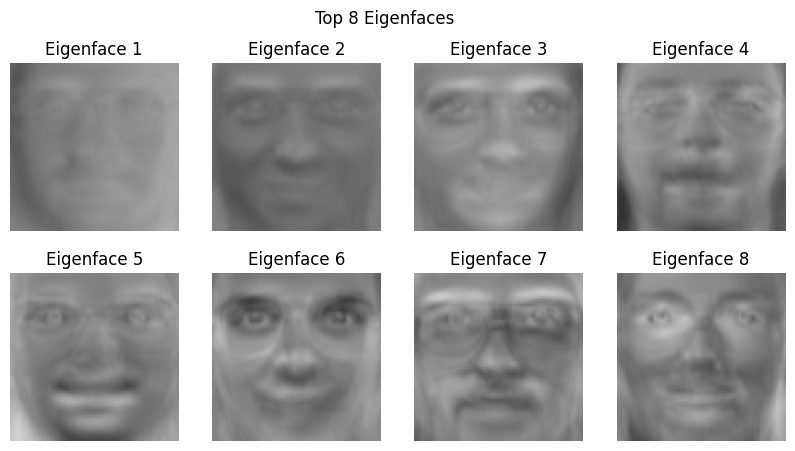

In [ ]:
# Visualize the top 8 eigenfaces (eigenvectors with largest eigenvalues)
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    eigenface = P[:, i].reshape(64, 64)
    ax.imshow(eigenface, cmap=plt.cm.gray, vmin=-0.1, vmax=0.1)
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')
plt.suptitle("Top 8 Eigenfaces")
plt.show()

##### **Explanation**

* **Eigenfaces**: Each eigenface represents patterns of variation in the face data. Eigenfaces with higher eigenvalues capture more prominent features, such as face shape or orientation, while those with lower eigenvalues capture finer details.
* **Observations**: The top eigenfaces often show general facial structure, such as average eye position, nose shape, and face outline. As you progress to eigenfaces with smaller eigenvalues, the features become subtler, capturing variations like expression or lighting.

###(3) Reconstruction and Eigenface Approximation

**Steps:**

1.  Transform the Faces:
  *  Apply the transformation $Y_{sub} = P^{\; T}(X_{sub} − \bar{x})$, where each column of $Y_{sub}$ is the projection of a face in $X_{sub}$ onto the eigenfaces.
  
2.  Reconstruct a Face:

  * Select one face’s transformed vector $y$ from $Y_{sub}$, then use $ P ⋅ y + \bar{x}$ to recreate the original face.

3.  Own Face Image Reconstruction:

  * Load an image of your own face, project it onto the eigenfaces, and attempt partial reconstructions using a subset of eigenfaces. Evaluate reconstruction quality for various numbers of eigenfaces $k$.

##### Fixing Dimensionality for $Y_{sub}$

####  **Part a: Objective** &rArr; Demonstrate that each face in $𝑋_{sub}$ can be perfectly reconstructed as a linear combination of eigenfaces plus the mean face.


**Steps:**

1.  Transform Faces in $𝑋_{sub}$:
  *  Calculate $𝑌_{sub} = 𝑃^{\;𝑇} ⋅ (𝑋_{sub} \; − \; \bar{x})$ where $Y_{sub}$ is the transformed matrix.
  
2.  Reconstruct a Face from $Y_{sub}$:

  * Choose any column vector $𝑦$ from $Y_{sub}$ (which represents the transformed version of a face).

  * Reconstruct the corresponding face in $𝑋_{sub}$ by computing $\hat{x} = 𝑃⋅𝑦 + \hat{x}$.

  * Display or visualize this reconstructed face to verify it matches the original face in $X_{sub}$.

#####  **(3a) Demonstrate Linear Combination for Face Reconstruction**

P shape: (4096, 4096)
Ysub shape: (4096, 200)
xbar shape: (4096, 1)
Reshaped Ysub: (4096, 1)


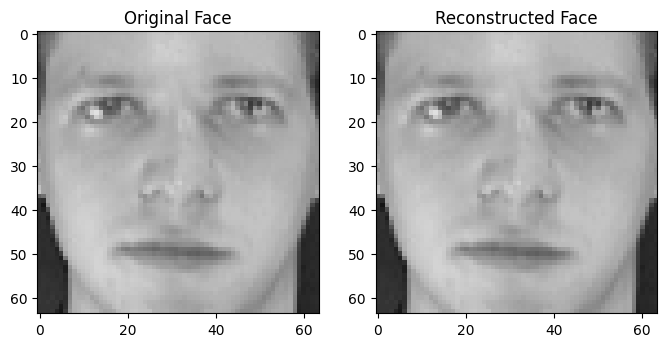

In [ ]:
# Part 3a: Demonstrating the Linear Combination for Face Reconstruction
Ysub = P.T @ (Xsub - xbar)  # Project faces onto eigenface space
print("P shape:", P.shape)             # Should be (4096, 4096)
print("Ysub shape:", Ysub.shape)       # Should be (4096, 200)
print("xbar shape:", xbar.shape)       # Should be (4096, 1)
Ysub = Ysub[:, [0]]
print("Reshaped Ysub:",Ysub.shape)
reconstructed_face = P @ Ysub + xbar  # Reconstruct first face in Xsub

# Visualize the original and reconstructed faces for comparison
original_face = Xsub[:, 0].reshape(64, 64)
reconstructed_face = reconstructed_face.reshape(64, 64)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(original_face, cmap='gray', vmin=0, vmax=1)
axs[0].set_title("Original Face")
axs[1].imshow(reconstructed_face, cmap=plt.cm.gray, vmin=0, vmax=1) # cmap=plt.cm.gray and cmap='gray' are the same thing.
axs[1].set_title("Reconstructed Face")
plt.show()



```python
y = Ysub[:, [0]]
```



this code snippet above extracts the first column of the array ```Ysub``` while keeping the result as a 2D array with a single column. Let's break down what each part does and why it reshapes in this way:

**Explanation of Each Part** \;
1.  ```Ysub[:, [0]]```:

  * The ```:``` symbol means "select all rows."
  * ```[0]``` inside the brackets is a list with a single element, 0, specifying the column to extract.
  * By using ```[0]``` instead of ```0```, the syntax keeps the result in a 2D array format rather than collapsing it to a 1D array.

2.  Why ```[0]``` keeps the 2D shape:

  * If you instead used ```Ysub[:, 0]```, the resulting output would be a 1D array with all values from the first column. This syntax effectively flattens the selection.
  * However, by using ```[:, [0]]```, you select the first column but retain the dimensionality. The result will have the shape ```(n, 1)```, where n is the number of rows in ```Ysub```.

**Resulting Shape of ```y```** \;
If ```Ysub``` originally has a shape ```(n, m)```, then:

  * ```Ysub[:, [0]]``` will have a shape of ```(n, 1)```, representing a 2D array with one column.

This reshaping can be useful when you want to ensure that ```y``` has two dimensions, which is often necessary for compatibility in matrix operations or broadcasting in Python libraries like NumPy.

##### **Explanation**

* **Perfect Reconstruction**: This step shows that any face in
$X_{sub}$ can be reconstructed exactly using a combination of the mean face $\bar{x}$ and a weighted sum of the eigenfaces (columns of $P$). The weights are stored in $y$, the face’s projection $Y_{sub}$.

###### Methods for reshaping

```python
print(Ysub[:, 0])
'''
Output: [ 1.54130153e+00 -4.57309371e+00  1.20998345e+00 ... -2.68197697e-07
 -8.40053971e-08  4.71256019e-08]
'''
y = Ysub[:, 0].reshape(-1, 1)
print(Ysub[:, 0].shape)
# Output: (4096,)

print(y.shape)
# Output: (4096, 1)

y = Ysub[:, [0]]
print(y.shape) # Output: (4096, 1)

'''
In this approach:

Ysub[:, [0]] selects the first column of Ysub and keeps it as a 2D array with shape (4096, 1).
By specifying [0] (a list containing only the index 0), the selection is treated as a 2D array with one column, instead of flattening it into a 1D array.
'''

#  another way to reshape the first column of Ysub into a column vector, using np.newaxis:
print(Ysub[:, 0].shape)
# Output: (4096,)

y = Ysub[:, 0][:, np.newaxis]
print(y.shape)
# Output: (4096, 1)

'''
In this approach:

Ysub[:, 0] extracts the first column as a 1D array.
[:, np.newaxis] adds a new axis, converting it into a column vector (2D array).
'''


# another way, using np.expand_dims to add an extra dimension:
y = np.expand_dims(Ysub[:, 0], axis=1)
print(y.shape)
# Output: (4096, 1)

'''
In this approach:

Ysub[:, 0] selects the first column as a 1D array.
np.expand_dims(..., axis=1) inserts a new axis along axis=1, turning it into a column vector
'''
```

####  **Part b: Objective** &rArr; Reconstruct your own face using a limited number of eigenfaces to see how well it approximates the original image with fewer components.


**Steps:**

1.  Prepare and Load Face Image:
  *  Crop, grayscale, and resize your photo to 64x64 pixels. Then, save it in “.pgm” format, then load it as ```image_me```.
  
2.  Transform Your Face Image:

  * Subtract the mean face from image_me and project it onto the eigenfaces to get $y_{me} = P^T ⋅ (image$_$me - \bar{x})$

3.  Reconstruct the Image Using Top 𝑘 Eigenfaces:

  * For various values of 𝑘 like; 1, 5, 10, 50, partially reconstruct ```image_me``` using only the first 𝑘 columns of 𝑃.

  * Calculate the goodness of fit for each 𝑘 by measuring the norm of the difference between the partial reconstruction and the original image_me.

4.  Evaluate and Visualize:

  * Plot the goodness of fit against 𝑘 to assess how well the reconstructed image matches the original.

  * Display the final reconstructed image using the optimal number of eigenfaces.

In [ ]:
import urllib.request
# this library is solely used for getting the pgm image into my google colabs jupyter notebook environmentto enable me read the file.

# URL to your face image
my_face_url = 'https://drive.google.com/uc?export=view&id=1q-nFV5BvbvWL1ZK2DUw-dQqn0zF7GJFv'
urllib.request.urlretrieve(my_face_url, "my_face_url.pgm")  # Download image

my_face_url_1 = 'https://drive.google.com/uc?export=view&id=1q3CbUE0Q8ukKcse3YXM9Dr54jY-Kxz1T'
urllib.request.urlretrieve(my_face_url, "my_face_url_1.pgm")  # Download image

my_face_url_2 = 'https://drive.google.com/uc?export=view&id=1DvXHVpA1R2kW5Y_j1835Qq1x-ZJak0o3'
urllib.request.urlretrieve(my_face_url, "my_face_url_2.pgm")  # Download image


('my_face_url_2.pgm', <http.client.HTTPMessage at 0x7ce5d0f650c0>)

#####  **(3b) Reconstruct your own face using a limited number of eigenfaces**

Shape of image_me_1: (4096, 1)
Shape of xbar: (4096, 1)


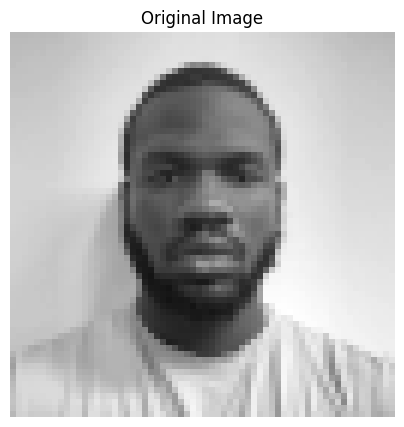

In [ ]:
# Printing my image like in 3a
# Load my face image (64x64 grayscale) and then flattening it to a 4096x1 vector
image_me_0 = plt.imread('my_face_url_2.pgm').flatten()

# Reshape to ensure it’s a column vector of size (4096, 1)
image_me_1 = image_me_0.reshape(-1, 1)

# Check shapes of image_me_1 and xbar
print("Shape of image_me_1:", image_me_1.shape)  # Should be (4096, 1)
print("Shape of xbar:", xbar.shape)              # Should be (4096, 1)

# Plot the original and fully reconstructed images side-by-side
plt.figure(figsize=(5, 5))

# Original image
plt.imshow(image_me_1.reshape(64, 64), cmap=plt.cm.gray, vmin=0, vmax=220)
plt.title("Original Image")
plt.axis('off')

plt.show()

In [ ]:
print(image_me.max())

220


[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


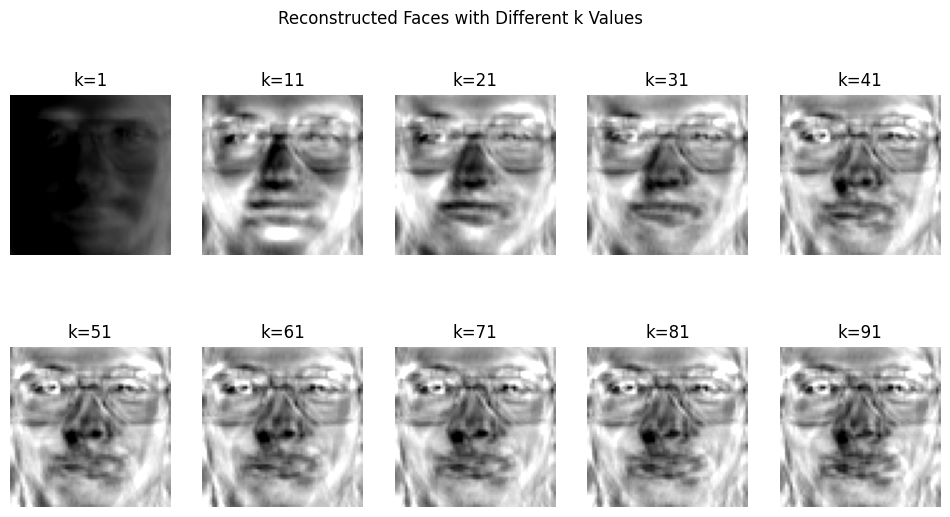

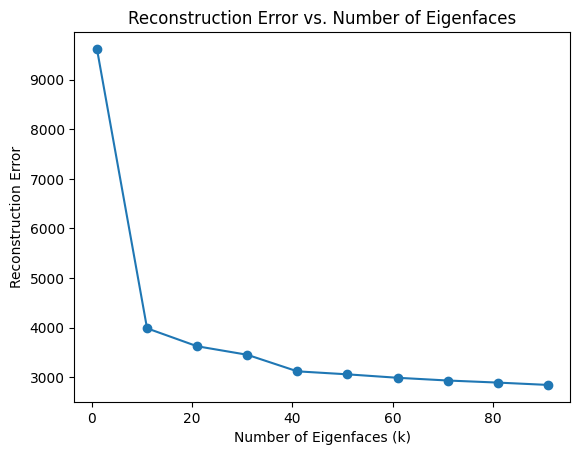

In [ ]:
# Load a custom face image, process, and reshape
image_me = plt.imread('my_face_url_1.pgm').reshape(4096, 1)  # filename adjusted to the image as needed
y_me = P.T @ (image_me - xbar)  # Project onto eigenface space

# Partial reconstruction using the first k eigenfaces
errors = []
k_values = list(range(1, 101, 10))  # Test with increments of 10
print(k_values)
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i, k in enumerate(k_values):
    y_k = y_me[:k]  # Use only the first k components
    P_k = P[:, :k]  # Select the first k eigenfaces
    reconstruction_k = P_k @ y_k + xbar  # Reconstruct face
    error = np.linalg.norm(image_me - reconstruction_k)  # Calculate reconstruction error
    errors.append(error)

    # Display reconstructed face for each k value
    axs[i // 5, i % 5].imshow(reconstruction_k.reshape(64, 64), cmap=plt.cm.gray, vmin=0, vmax=220)
    axs[i // 5, i % 5].set_title(f"k={k}")
    axs[i // 5, i % 5].axis('off')

plt.suptitle("Reconstructed Faces with Different k Values")
plt.show()

# Plot error as a function of k
plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Eigenfaces (k)")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error vs. Number of Eigenfaces")
plt.show()

##### **Explanation**

* **Reconstruction Quality**: As 𝑘 increases, more eigenfaces are used in the reconstruction, capturing more detail from ```image_me```. This reduces the error and improves the fit, shown in the goodness-of-fit plot.

* **Optimal 𝑘**: The top eigenfaces often show generalWith a small 𝑘, only rough features are captured, but increasing 𝑘 leads to sharper, more accurate reconstructions. For face images, using only the top 50-100 eigenfaces often provides a good balance between detail and computational efficiency.

##**References**

1. Brémaud, P. (1999). *Markov chains: Gibbs fields, Monte Carlo simulation, and queues*. Springer Science & Business Media.  
   - Explanation: This book provides foundational information on Markov chains and is useful for understanding the mathematical modelling of system states over time.

2. Turk, M., & Pentland, A. (1991). Eigenfaces for recognition. *Journal of Cognitive Neuroscience, 3*(1), 71–86. https://doi.org/10.1162/jocn.1991.3.1.71  
   - Explanation: This seminal paper introduced eigenfaces as a method for facial recognition, detailing how faces can be represented as linear combinations of eigenvectors, which is central to working with the Olivetti Faces dataset.

3. Bishop, C. M. (2006). *Pattern recognition and machine learning*. Springer.  
   - Explanation: Chapter 12 of this book covers dimensionality reduction, PCA, and eigenvalues/eigenvectors. This material goes into the analysis of the covariance matrix and eigenfaces.

4. Scikit-Learn Developers. (2023). Olivetti faces dataset. In Scikit-learn: Machine learning in Python. https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces  
   - Explanation: Scikit-learn’s Olivetti Faces dataset is used in this task. This dataset is frequently used in facial recognition and machine learning applications to demonstrate eigenface techniques.

5. Grimmett, G., & Stirzaker, D. (2001). *Probability and random processes* (3rd ed.). Oxford University Press.  
   - Explanation: This text delves into probability theory and Markov processes, offering insights into Markov chains and their long-term behaviour. It is useful for the transition matrix and steady-state calculations in Task 1.

6. Shlens, J. (2014). A tutorial on principal component analysis. *arXiv preprint arXiv:1404.1100*. https://arxiv.org/abs/1404.1100  
    - Explanation: This tutorial explains PCA in a practical, accessible way, focusing on eigenvectors and eigenvalues, making it ideal for understanding the linear combinations used in image reconstruction.

7. Rabiner, L., & Juang, B. H. (1986). An introduction to hidden Markov models. *IEEE ASSP Magazine, 3*(1), 4–16. https://doi.org/10.1109/MASSP.1986.1165342  
    - Explanation: This paper introduces hidden Markov models (HMMs), providing insight into probabilistic models and transitions, expanding on Markov processes in the context of modeling sequences and transitions.

8. Zhao, W., Chellappa, R., Rosenfeld, A., & Phillips, P. J. (2003). Face recognition: A literature survey. *ACM Computing Surveys (CSUR), 35*(4), 399–458. https://doi.org/10.1145/954339.954342  
    - Explanation: This survey provides an overview of face recognition techniques, including eigenfaces, detailing their strengths, limitations, and relevance in computer vision tasks.

9. Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature, 585*(7825), 357–362. https://doi.org/10.1038/s41586-020-2649-2  
    - Explanation: Numpy's array operations, like `np.linalg.inv`, were essential for efficient computations with matrices and eigenvectors in your tasks. Documentation for specific functions used can be found at https://numpy.org/doc/stable/reference/.

10. Matplotlib Developers. (2023). *Matplotlib documentation*. https://matplotlib.org/stable/contents.html  
    - Explanation: Matplotlib provided the plotting functions used to visualize data in your tasks. This documentation is a valuable resource for functions like `plt.subplot()` and `plt.imshow()`.

11. Byju's. (2023). *Matrix operations*. https://byjus.com/maths/matrix-operations/, https://byjus.com/question-answer/what-is-meant-by-orthogonal-matrix/
    - Explanation: Byju's provided insights on matrix operations, properties and orthogonal Matrix, supporting calculations with transition matrices and eigenvectors.

12. McKinney, W. (2017). *Python for data analysis: Data wrangling with pandas, NumPy, and Jupyter* (2nd ed.). O'Reilly Media.  
    - Explanation: This book was a resource for data manipulation and indexing techniques, particularly useful for managing data with Numpy arrays.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.


End.
